# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data=pd.merge(mouse_metadata,study_results,on="Mouse ID")
complete_data=complete_data[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]
                             

# Display the data table for preview
complete_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [42]:
# Checking the number of mice.
mouse_count=complete_data["Mouse ID"].nunique()
mouse_count


249

In [43]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_timepoints=complete_data[complete_data.duplicated(["Mouse ID","Timepoint"],keep=False)]
duplicate_mouse_ID=duplicate_timepoints["Mouse ID"].unique()
print(repr(duplicate_mouse_ID))


array(['g989'], dtype=object)


In [44]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data=complete_data[complete_data["Mouse ID"]=="g989"]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data=complete_data[~complete_data["Mouse ID"].isin(duplicate_mouse_ID)]
cleaned_data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [46]:
# Checking the number of mice in the clean DataFrame.
updated_mouse_count=cleaned_data["Mouse ID"].nunique()
updated_mouse_count


248

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_stats=pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variance":var,
    "Tumor Volume Std. Dev.":std,
    "Tumor Volume Std. Err.":sem})
summary_stats
    

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats=cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
#summary_stats.columns=["Mean
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

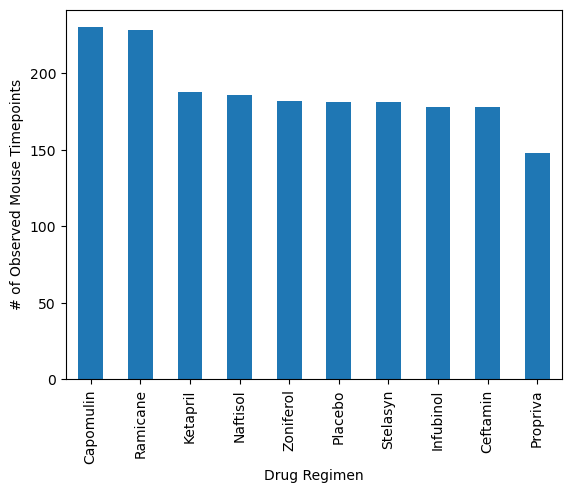

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts=cleaned_data["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar",xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")




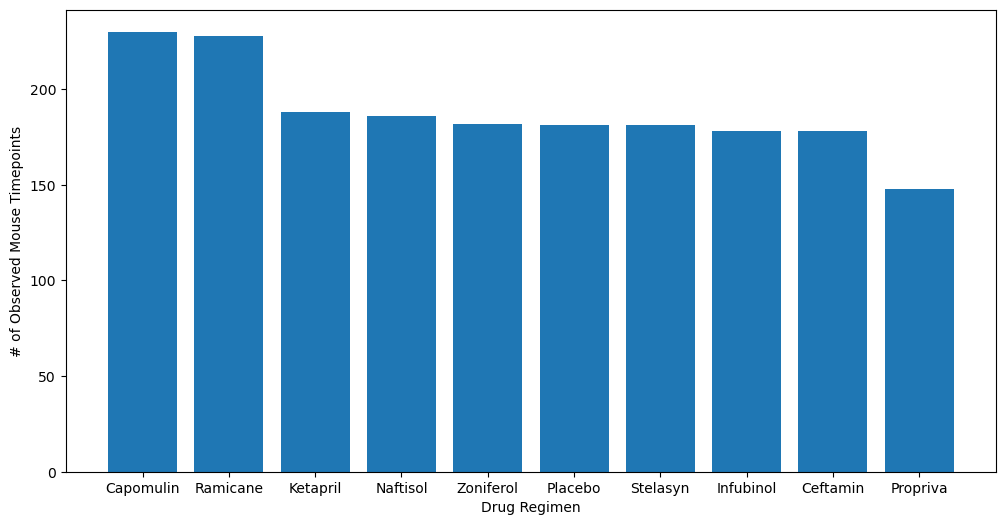

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(12,6))
plt.bar(regimen_counts.index,regimen_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


<Axes: ylabel='count'>

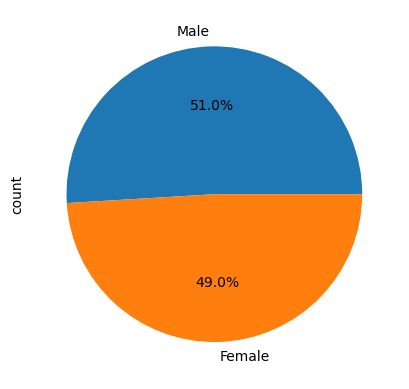

In [52]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study


# Get the unique mice with their gender

gender_counts=cleaned_data["Sex"].value_counts()
# Make the pie chart

gender_counts.plot(kind="pie",autopct="%0.1f%%")


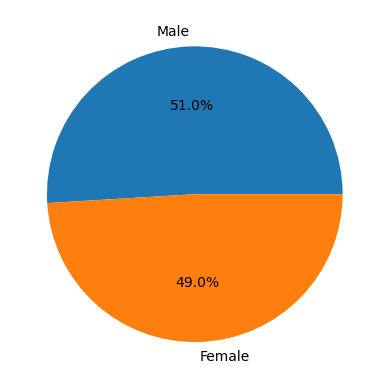

In [53]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(gender_counts,labels=gender_counts.index,autopct="%0.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoints=cleaned_data.groupby("Mouse ID").max()["Timepoint"]
final_tumor_data=pd.merge(last_timepoints,cleaned_data,on=["Mouse ID","Timepoint"])

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = {treatment: final_tumor_data[final_tumor_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments}



In [56]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
for treatment, volumes in tumor_volumes.items():
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - 1.5 * IQR
    upper_bound = quartiles[0.75] + 1.5 * IQR
    outliers = volumes[(volumes<lower_bound)|(volumes>upper_bound)]
    print(f"{treatment} Outliers: {outliers}")

Capomulin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\asiab\AppData\Local\Temp\ipykernel_30216\774640088.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([volumes for volumes in tumor_volumes.values()], labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))


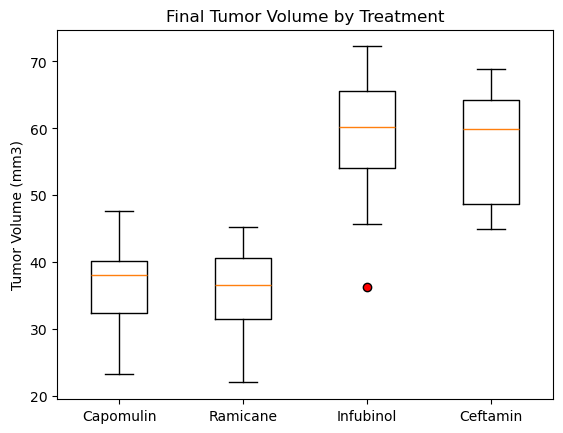

In [57]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot([volumes for volumes in tumor_volumes.values()], labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))
plt.title("Final Tumor Volume by Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

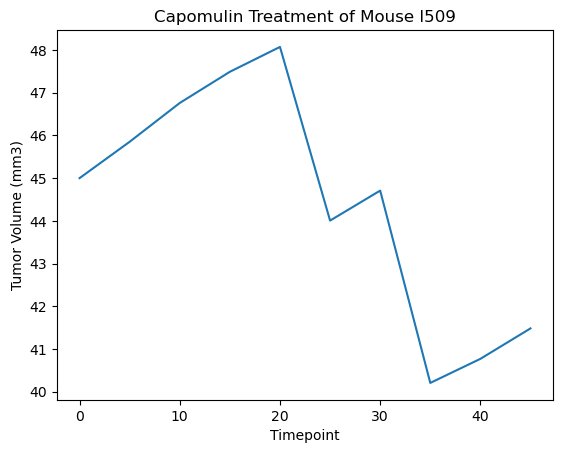

In [58]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == 'l509')]
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


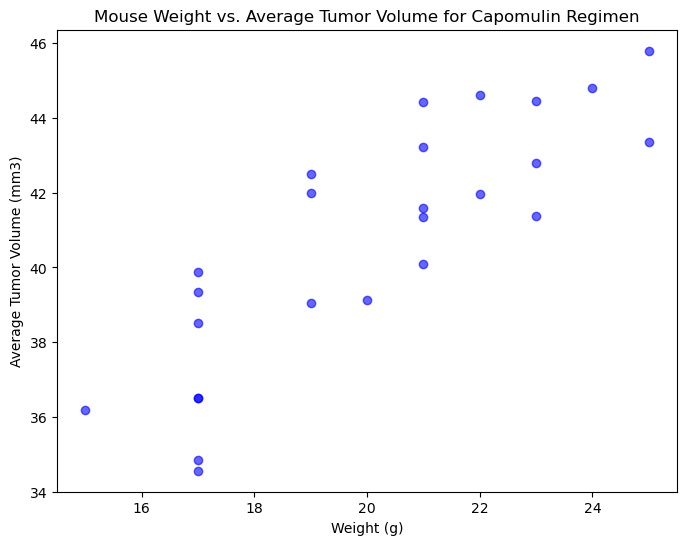

In [59]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = complete_data[complete_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the weight of each mouse (since weight is constant per mouse, we can use the first occurrence)
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='blue', alpha=0.6)

# Set axis labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()


## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84


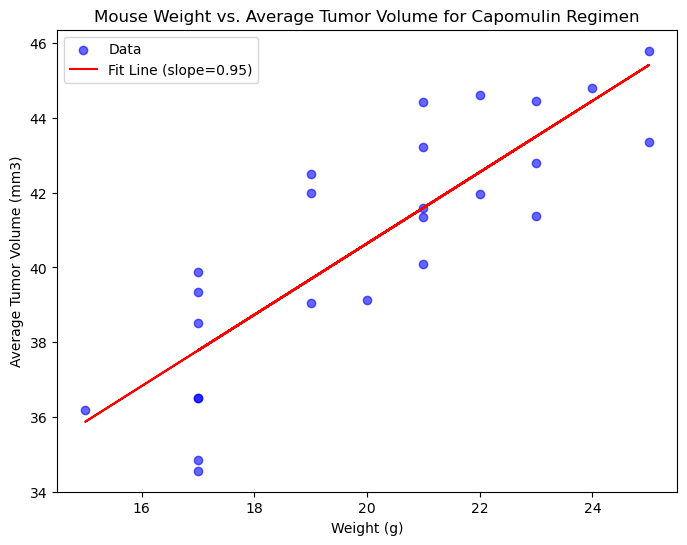

In [60]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate correlation coefficient
correlation = st.pearsonr(mouse_weight, average_tumor_volume)[0]
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)

# Generate values for the regression line
regression_line = slope * mouse_weight + intercept

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='blue', alpha=0.6, label='Data')
plt.plot(mouse_weight, regression_line, color='red', label=f'Fit Line (slope={slope:.2f})')

# Set axis labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Display correlation in the legend
plt.legend()
plt.show()
